<a href="https://colab.research.google.com/github/assafrbi/mini-project-Digital-Humanities/blob/main/dh_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
!pip install cinemagoer
!pip install pyLDAvis
!pip install swifter
!pip install wikipedia

import re
from pydoc import synopsis
import requests
from bs4 import BeautifulSoup
from dateutil.parser import parse
import concurrent.futures
import pandas as pd
import wikipedia
import numpy as np
import json
import glob
from imdb import Cinemagoer
import tqdm
import time
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
from nltk.corpus import stopwords
nltk.download('all')
import pyLDAvis
import pyLDAvis.gensim_models
import collections
from operator import itemgetter
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import swifter
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package ieer to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/ieer.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package indian to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/indian.zip.
[nltk_data]    | Downloading package jeita to /root/nltk_data...
[nltk_data]    | Downloading package kimmo to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/kimmo.zip.
[nltk_data]    | Downloading package knbc to /root/nltk_data...
[nltk_data]    | Downloading package large_grammar

### Load Data from IMDb

In [4]:
movie_title_arr = []
movie_year_arr = []
movie_genre_arr = []
image_id_arr = []
movie_synopsis_arr = []

In [5]:
ia = Cinemagoer()

def getSynopsisFromImdb(id):
  movie = ia.get_movie(id)
  plot = movie.get('plot')[0]
  indx = plot.find('::')
  if indx != -1:
    return plot[:indx]
  return plot

In [6]:
def getMovieTitle(header):
  try:
    return header[0].find("a").getText()
  except:
    return 'NA'

def getReleaseYear(header):
  try:
    return header[0].find("span",  {"class": "lister-item-year text-muted unbold"}).getText().strip()[-5:-1]
  except:
    return 'NA'

def getGenre(muted_text):
  try:
    return muted_text.find("span",  {"class":  "genre"}).getText().strip()
  except:
    return 'NA'
        
def getsynopsys(id):
  try:
    movie_synopsis = getSynopsisFromImdb(id)
    return movie_synopsis
  except:
    return 'NA'

def getImageId(image):
  try:
    return image.get('data-tconst')[2:]
  except:
    return 'NA'

In [7]:
def main(imdb_url):
  response = requests.get(imdb_url)
  soup = BeautifulSoup(response.text, 'html.parser')

  # Movie Name
  movies_list  = soup.find_all("div", {"class": "lister-item mode-advanced"})
    
  for movie in movies_list:
    header = movie.find_all("h3", {"class":  "lister-item-header"})
    muted_text = movie.find_all("p", {"class":  "text-muted"})[0]
    imageDiv =  movie.find("div", {"class": "lister-item-image float-left"})
    image = imageDiv.find("img", "loadlate")
        
    # Movie Title
    movie_title = getMovieTitle(header)
    movie_title_arr.append(movie_title)

    # Movie id
    id = getImageId(image)
    image_id_arr.append(id)
        
    # Movie release year
    year = getReleaseYear(header)
    movie_year_arr.append(year)

    # Movie Synopsys
    synopsis = getsynopsys(id)
    movie_synopsis_arr.append(synopsis)

    # Genre
    genre = getGenre(muted_text)
    movie_genre_arr.append(genre)
        

In [8]:
# An array to store all the URL that are being queried
imageArr = []

# Maximum number of pages one wants to iterate over
MAX_PAGE =51

# Loop to generate all the URLS.
for i in range(1, 1500, 50):
  imdb_url = f'https://www.imdb.com/search/title/?title_type=feature&countries=il&start={i}&ref_=adv_nxt'
  imageArr.append(imdb_url)

In [9]:
# Maximum number of threads that will be spawned
MAX_THREADS = 6

def download_stories(story_urls):
  threads = min(MAX_THREADS, len(story_urls))
  with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
    time.sleep(0.3)
    executor.map(main, story_urls)

In [26]:
# Call the download function with the array of URLS called imageArr
download_stories(imageArr)

# Attach all the data to the pandas dataframe. You can optionally write it to a CSV file as well
movieDf = pd.DataFrame({
    "Title": movie_title_arr,
    "Year": movie_year_arr,
    "Genre": movie_genre_arr,
    "Synopsis": movie_synopsis_arr,
    "IMDb id": image_id_arr,
})

movieDf.to_csv('israel_originated_movies_imdb.csv')

NameError: ignored

In [ ]:
movieDf

,Title,Year,Genre,Synopsis,IMDb id
0,The Lost Daughter,2021,"Comedy, Drama",A young Israeli man absconds to Paris to flee ...,9100054
1,A Story of David,1960,Drama,A woman's beach vacation takes a dark turn whe...,0054342
2,Rumpelstiltskin,1987,Drama,King Saul of Israel is jealous of the fame and...,0093891
3,Bloomfield,1970,Drama,"Secrets, lies, surprises and more are explored...",0068694
4,Synonymes,2019,"Drama, Sport",Eitan is yesterday's football star waiting for...,7016254
...,...,...,...,...,...
1466,BaKavod Sheli,2004,Drama,NA,8317822
1467,Outcry,1998,Horror,NA,9354814
1468,Alenbi Romance,2005,"Drama, Romance","""All of those romantic movies are always in fo...",0808145
1469,Street 60,1976,"Drama, Romance",NA,5524664


In [ ]:
complete_data = pd.read_csv('israel_originated_movies_imdb.csv').dropna()
complete_data.to_csv('ready_for_topic_modeling.csv', index=False)

complete_data

,Unnamed: 0,Title,Year,Genre,Synopsis,IMDb id
0,0,The Lost Daughter,2021,"Comedy, Drama",A young Israeli man absconds to Paris to flee ...,9100054
1,1,A Story of David,1960,Drama,A woman's beach vacation takes a dark turn whe...,54342
2,2,Rumpelstiltskin,1987,Drama,King Saul of Israel is jealous of the fame and...,93891
3,3,Bloomfield,1970,Drama,"Secrets, lies, surprises and more are explored...",68694
4,4,Synonymes,2019,"Drama, Sport",Eitan is yesterday's football star waiting for...,7016254
...,...,...,...,...,...,...
1459,1459,Savage the Man,2017,Comedy,BlackSmile Challenging Himself To Create A 49 ...,6047312
1460,1460,Visa,2013,"Comedy, Drama",A sham marriage for the sake of a UK residence...,3002628
1465,1465,The Glow of Heavens,2012,Drama,The story of a young soldier in the Israeli ar...,2931934
1468,1468,Alenbi Romance,2005,"Drama, Romance","""All of those romantic movies are always in fo...",808145


### Load Synopses from Wikipedia

In [3]:
wiki_title = []
wiki_plot = []
wiki_summary = []

In [4]:
def find_title_on_wikipedia(title, year):
    search_results = wikipedia.search(title, results=20)
    search_results_exact = [s for s in search_results if title in s] # results that have the exact title as part of them
    
    if len(search_results_exact) != 0: # if the title is part of at least one result

        # if film exists in title but not together with series or score (an example was Resident Evil 2002)
        search_results_film = [s for s in search_results_exact if 'film' in s and 'score' not in s and 'series' not in s]

        # Go on by additionaly searching for the year in the title
        if len(search_results_film) == 0: # if there is no results with 'film' in the title
            search_results_year = [s for s in search_results_exact if str(year) in s]
            if len(search_results_year) == 0: # if there is no results with year in the title
                search_results_final = search_results_exact
            else:
                search_results_final = search_results_year
        else:
            search_results_year = [s for s in search_results_film if str(year) in s]
            if len(search_results_year) == 0:
                search_results_final = search_results_film
            else:
                search_results_final = search_results_year  

        # for the possible remains of the search results take the exact match or the first result
        for s in search_results_final:
            if s == title:
                title = s
            else:
                title = search_results_final[0]
    
    else: # take the first result
        title = search_results[0]

    return title

def add_wikipedia(data):
  section_names = ['Plot','Synopsis','Plot synopsis','Plot summary', 'Story', 'Plotline', 'The Beginning', 'Summary', 'Content','Premise']
  for i in range (len(data)):
    imdb_title = data['Title'][i]
    year = data['Year'][i]
    title, page, plot, summary = np.nan, np.nan, np.nan, np.nan

    try:
      title = find_title_on_wikipedia(imdb_title, year)
      search_results = wikipedia.search(title, results=20)
      page = wikipedia.WikipediaPage(title = title)
    except:
      title = 'NA'

    for section in section_names:
        try:
            plot = page.section(section)
        except:
            plot = 'NA'

    # for some movies with general title - modify the search by adding (year film) next to title
    if plot is None or 'NA':
        imdb_title = f'{imdb_title} ({year} film)'
        try:          
            title = find_title_on_wikipedia(imdb_title, year)
            search_results = wikipedia.search(title, results=20)
            page = wikipedia.WikipediaPage(title = title)
        except:
            title = 'NA' 

        for section in section_names:
            try:
              plot = page.section(section)
            except:
              plot = 'NA'        
        
    try:
        summary = page.summary
    except:
        summary = 'NA'        
    
    wiki_title.append(title)
    wiki_plot.append(plot)
    wiki_summary.append(summary)


In [ ]:
data = pd.read_csv('israel_originated_movies_imdb.csv')
add_wikipedia(data)
data['Wiki Title'] = wiki_title
data['Wiki Plot'] = wiki_plot
data['Wiki Summary'] = wiki_summary

In [6]:
data.to_csv('israel_originated_movies_imdb_with_wiki.csv')
data

,Unnamed: 0,Title,Year,Genre,Synopsis,IMDb id,Wiki Title,Wiki Plot,Wiki Summary
0,0,The Lost Daughter,2021,"Comedy, Drama",A young Israeli man absconds to Paris to flee ...,9100054,The Lost Daughter,None,The Lost Daughter is a 2021 psychological dram...
1,1,A Story of David,1960,Drama,A woman's beach vacation takes a dark turn whe...,54342,Pollyanna (1960 film),None,Pollyanna is a 1960 feature film starring chil...
2,2,Rumpelstiltskin,1987,Drama,King Saul of Israel is jealous of the fame and...,93891,Rumpelstiltskin (1987 film),None,Rumpelstiltskin is a 1987 musical fantasy film...
3,3,Bloomfield,1970,Drama,"Secrets, lies, surprises and more are explored...",68694,Bloomfield (film),None,Bloomfield (released in the United States as T...
4,4,Synonymes,2019,"Drama, Sport",Eitan is yesterday's football star waiting for...,7016254,Synonyms (film),None,Synonyms (French: Synonymes) is a 2019 interna...
...,...,...,...,...,...,...,...,...,...
1466,1466,BaKavod Sheli,2004,Drama,NaN,8317822,NA,None,Levin Kipnis (Hebrew: לֶוִין קִיפְּנִיס; 1 Aug...
1467,1467,Outcry,1998,Horror,NaN,9354814,Spider-Man in film,None,"The fictional character Spider-Man, a comic bo..."
1468,1468,Alenbi Romance,2005,"Drama, Romance","""All of those romantic movies are always in fo...",808145,List of Israeli films of 2005,None,A list of films produced by the Israeli film i...
1469,1469,Street 60,1976,"Drama, Romance",NaN,5524664,Network (1976 film),None,Network is a 1976 American satirical black com...


### Text Preprocessing

 Tokenize and Clean

In [ ]:
def remove_new_line_characters(text):
  return re.sub('\s+', ' ', text)

def remove_quotes(text):
  text = re.sub("\'", "", text)
  text = re.sub('\"', '', text)
  return text

def lowercase(text):
  return text.lower()    

def remove_single_char_words(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_verbs(text):
  final_text = ''
  allowedWordTypes = ["J","R","N"]
  tokens = nltk.word_tokenize(text)
  tagged = nltk.pos_tag(tokens)
  for w in tagged:
    if w[1][0] in allowedWordTypes:
      final_text += f' {w[0]}'
  return final_text

def text_preprocess(text):
  text = remove_new_line_characters(text)
  text = remove_quotes(text)
  text = lowercase(text)
  text = remove_single_char_words(text)
  text = remove_verbs(text)
  return text

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
ready_data = pd.read_csv('ready_for_topic_modeling.csv')

ready_data.loc[ready_data['Synopsis']!='']
source = 'Synopsis'
data = ready_data.copy()

print(f'---Doing pre-processing for {source}..')
print('Initial pre-processing..')

data[source] = data[source].apply(lambda x: text_preprocess(x))

data = data[source].to_list()
data_words = list(sent_to_words(data))
data_words

---Doing pre-processing for Synopsis..
Initial pre-processing..


[['young',
  'israeli',
  'man',
  'nationality',
  'trusty',
  'franco',
  'israeli',
  'dictionary'],
 ['womans', 'vacation', 'dark', 'turn', 'troubles', 'past'],
 ['saul',
  'israel',
  'jealous',
  'fame',
  'adoration',
  'david',
  'long',
  'ago',
  'slew',
  'goliath',
  'victory',
  'armies',
  'now',
  'edomite',
  'counselor',
  'doeg',
  'attempts',
  'david',
  'sauls',
  'son',
  'davids',
  'best',
  'jonathan',
  'reluctant',
  'back',
  'own',
  'people',
  'israelites'],
 ['secrets',
  'lies',
  'surprises',
  'more',
  'rich',
  'selection',
  'gay',
  'short',
  'films',
  'israel'],
 ['eitan',
  'yesterdays',
  'football',
  'star',
  'tomorrow',
  'man',
  'nothing',
  'guts',
  'prospects',
  'new',
  'profession',
  'woman',
  'problems'],
 ['musical',
  'version',
  'classic',
  'story',
  'millers',
  'help',
  'mischievous',
  'dwarf',
  'then',
  'up',
  'head',
  'now',
  'servant',
  'girl',
  'only',
  'hope',
  'baby',
  'son',
  'john'],
 ['father',
  '

Build the Bigram, Trigram Models and Lemmatize

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['israeli', 'film'])

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def make_bigrams(texts, bigram_mod):
  return [bigram_mod[doc] for doc in texts]
  
def lemmatization_x(sent, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  doc = nlp(" ".join(sent)) 
  return [token.lemma_ for token in doc if token.pos_ in allowed_postags]

def join_list(the_list):
  str1 = " " 
  return str1.join(the_list)

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

In [ ]:
# Build the bigram model
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100, progress_per=200) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Remove Stop Words
print('Removing stopwords..')
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
print('Creating bigrams..')
ready_data[f'{source}_words_bigrams'] = make_bigrams(data_words_nostops, bigram_mod)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python -m spacy download en_core_web_sm

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('Lemmatizing words..')
ready_data[f'{source}_lemmatized'] = ready_data[f'{source}_words_bigrams'].swifter.apply(lambda x: lemmatization_x(x))
ready_data = ready_data.drop(columns=[f'{source}_words_bigrams'])
ready_data[f'{source}_preprocessed'] = ready_data[f'{source}_lemmatized'].apply(lambda x: join_list(x))

del bigram, bigram_mod, data_words, data, nlp

ready_data

Removing stopwords..
Creating bigrams..
Lemmatizing words..


Pandas Apply:   0%|          | 0/1072 [00:00<?, ?it/s]

,Unnamed: 0,Title,Year,Genre,Synopsis,IMDb id,Synopsis_lemmatized,Synopsis_preprocessed
0,0,The Lost Daughter,2021,"Comedy, Drama",A young Israeli man absconds to Paris to flee ...,9100054,"[young, man, nationality]",young man nationality
1,1,A Story of David,1960,Drama,A woman's beach vacation takes a dark turn whe...,54342,"[vacation, dark, turn, trouble, past]",vacation dark turn trouble past
2,2,Rumpelstiltskin,1987,Drama,King Saul of Israel is jealous of the fame and...,93891,"[adoration, long, ago, victory, army, attempt,...",adoration long ago victory army attempt good p...
3,3,Bloomfield,1970,Drama,"Secrets, lies, surprises and more are explored...",68694,"[secret, lie, surprise, rich, selection, gay, ...",secret lie surprise rich selection gay short film
4,4,Synonymes,2019,"Drama, Sport",Eitan is yesterday's football star waiting for...,7016254,"[tomorrow, man, gut, prospect, new, profession...",tomorrow man gut prospect new profession woman...
...,...,...,...,...,...,...,...,...
1067,1459,Savage the Man,2017,Comedy,BlackSmile Challenging Himself To Create A 49 ...,6047312,"[blacksmile, minute, movie, full, youtube, con...",blacksmile minute movie full youtube content
1068,1460,Visa,2013,"Comedy, Drama",A sham marriage for the sake of a UK residence...,3002628,"[marriage, sake, partnership, man, british, wo...",marriage sake partnership man british woman al...
1069,1465,The Glow of Heavens,2012,Drama,The story of a young soldier in the Israeli ar...,2931934,"[story, young, soldier, army, people, home, la...",story young soldier army people home land deep...
1070,1468,Alenbi Romance,2005,"Drama, Romance","""All of those romantic movies are always in fo...",808145,"[romantic, movie, always, foreign, city, alway...",romantic movie always foreign city always easy...


#### Most common words


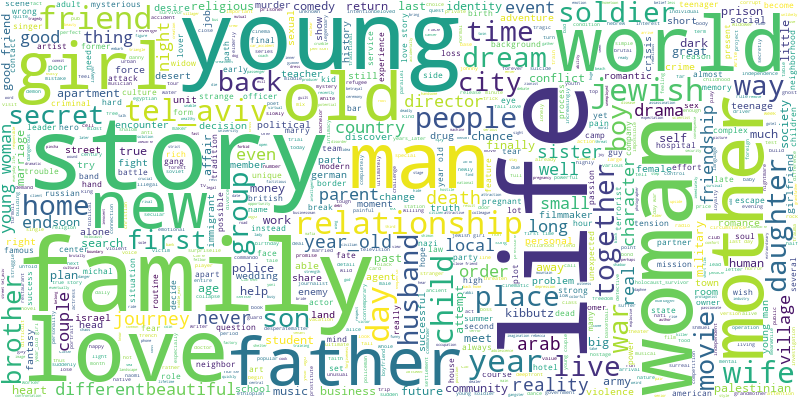

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    contour_width=3,
    contour_color='steelblue',
    width=800,
    height=400)
# Join the different processed titles together.
long_string = ','.join(ready_data[f'{source}_preprocessed'].to_list())
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Topic Modeling - Latent Dirichlet Allocation

Build The Topic Model

In [ ]:
def build_LDA_model(ready_data, source, num_topics):
  # Create the Dictionary and Corpus needed for Topic Modeling
  # Create Dictionary
  id2word = corpora.Dictionary(ready_data[f'{source}_lemmatized'].tolist())
  # Create Corpus
  texts = ready_data[f'{source}_lemmatized'].tolist()
  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]
  del texts
  
  # Build LDA model
  lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=7,
                                               eval_every=10,
                                               chunksize=100,
                                               passes=10,
                                               per_word_topics=True,
                                               workers=8)   
  return lda_model, corpus, id2word

def allocate_topics(i, lda_model):
  return lda_model[corpus[i]][0]

def get_max_probability_topic(x, num_topics):
  return max(x, key=itemgetter(1))[0]

In [ ]:
num_topics = 10
lda_model, corpus, id2word = build_LDA_model(ready_data, source=source, num_topics=num_topics)
lda_model.save('lda_model')

lda_model.print_topics()

[(0,
  '0.021*"family" + 0.016*"life" + 0.015*"story" + 0.013*"year" + 0.010*"woman" + 0.010*"mother" + 0.008*"young" + 0.008*"never" + 0.007*"jewish" + 0.007*"man"'),
 (1,
  '0.018*"love" + 0.017*"young" + 0.014*"life" + 0.013*"girl" + 0.009*"relationship" + 0.009*"woman" + 0.008*"story" + 0.007*"reality" + 0.007*"different" + 0.006*"year"'),
 (2,
  '0.014*"family" + 0.010*"friend" + 0.008*"father" + 0.008*"good" + 0.008*"day" + 0.007*"night" + 0.007*"young" + 0.007*"love" + 0.007*"back" + 0.006*"first"'),
 (3,
  '0.013*"woman" + 0.011*"story" + 0.009*"life" + 0.009*"young" + 0.006*"day" + 0.006*"small" + 0.006*"dream" + 0.005*"city" + 0.005*"old" + 0.005*"ethiopian"'),
 (4,
  '0.014*"young" + 0.013*"life" + 0.008*"love" + 0.008*"friend" + 0.007*"family" + 0.007*"girl" + 0.007*"woman" + 0.006*"true" + 0.006*"jewish" + 0.006*"story"'),
 (5,
  '0.018*"life" + 0.016*"soldier" + 0.009*"back" + 0.008*"brother" + 0.007*"military" + 0.007*"young" + 0.007*"place" + 0.006*"old" + 0.006*"story"

### Evaluation

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -8.274332246549058


Assign Dominant Topic to each record

In [ ]:
ready_data['i'] = [i for i in range(len(ready_data))]
ready_data[f'{source}_topic'] = ready_data['i'].swifter.apply(lambda x: allocate_topics(x, lda_model))
ready_data[f'{source}_topic'] = ready_data[f'{source}_topic'].apply(lambda x: get_max_probability_topic(x, num_topics))

del ready_data['i']
ready_data

Pandas Apply:   0%|          | 0/1072 [00:00<?, ?it/s]

,Unnamed: 0,Title,Year,Genre,Synopsis,IMDb id,Synopsis_lemmatized,Synopsis_preprocessed,Synopsis_topic
0,0,The Lost Daughter,2021,"Comedy, Drama",A young Israeli man absconds to Paris to flee ...,9100054,"[young, man, nationality]",young man nationality,1
1,1,A Story of David,1960,Drama,A woman's beach vacation takes a dark turn whe...,54342,"[vacation, dark, turn, trouble, past]",vacation dark turn trouble past,2
2,2,Rumpelstiltskin,1987,Drama,King Saul of Israel is jealous of the fame and...,93891,"[adoration, long, ago, victory, army, attempt,...",adoration long ago victory army attempt good p...,2
3,3,Bloomfield,1970,Drama,"Secrets, lies, surprises and more are explored...",68694,"[secret, lie, surprise, rich, selection, gay, ...",secret lie surprise rich selection gay short film,5
4,4,Synonymes,2019,"Drama, Sport",Eitan is yesterday's football star waiting for...,7016254,"[tomorrow, man, gut, prospect, new, profession...",tomorrow man gut prospect new profession woman...,2
...,...,...,...,...,...,...,...,...,...
1067,1459,Savage the Man,2017,Comedy,BlackSmile Challenging Himself To Create A 49 ...,6047312,"[blacksmile, minute, movie, full, youtube, con...",blacksmile minute movie full youtube content,5
1068,1460,Visa,2013,"Comedy, Drama",A sham marriage for the sake of a UK residence...,3002628,"[marriage, sake, partnership, man, british, wo...",marriage sake partnership man british woman al...,6
1069,1465,The Glow of Heavens,2012,Drama,The story of a young soldier in the Israeli ar...,2931934,"[story, young, soldier, army, people, home, la...",story young soldier army people home land deep...,8
1070,1468,Alenbi Romance,2005,"Drama, Romance","""All of those romantic movies are always in fo...",808145,"[romantic, movie, always, foreign, city, alway...",romantic movie always foreign city always easy...,6


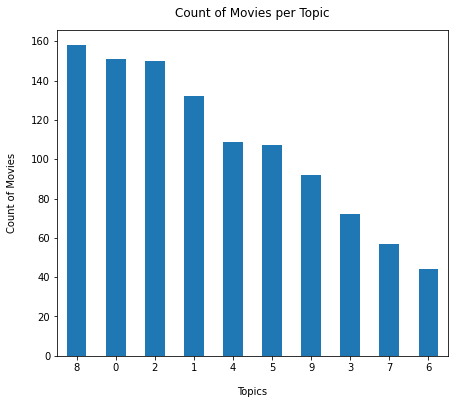

In [ ]:
ready_data[f'{source}_topic'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0);
plt.xlabel("Topics", labelpad=14)
plt.ylabel("Count of Movies", labelpad=14)
plt.title("Count of Movies per Topic", y=1.02);

### Visualize Topics


Word Clouds of Top N Keywords in Each Topic

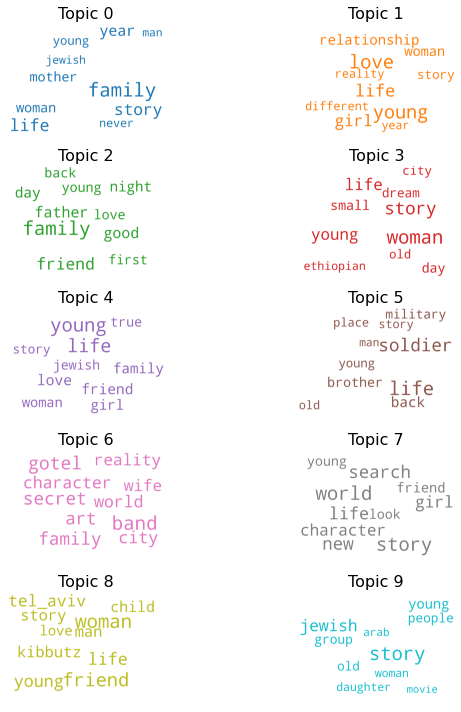

In [ ]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(int(num_topics/2), 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.088335 -0.018306       1        1  14.660163
2     -0.112066  0.019619       2        1  13.459712
0     -0.033374 -0.021129       3        1  13.290825
1      0.033629 -0.115354       4        1  12.761929
5      0.006505 -0.011829       5        1  10.193398
4     -0.000811 -0.048457       6        1   9.597349
9     -0.021882  0.005630       7        1   8.872408
3      0.035530  0.036434       8        1   6.457124
7      0.152318 -0.014112       9        1   5.931786
6      0.028486  0.167504      10        1   4.775304, topic_info=        Term        Freq       Total Category  logprob  loglift
323   family  140.000000  140.000000  Default  30.0000  30.0000
458  soldier   61.000000   61.000000  Default  29.0000  29.0000
143   jewish   74.000000   74.000000  Default  28.0000  28.0000
683  kibbutz   25.000000   25.000000  Default  27.0000  27.0000
34      girl   83.000000   83.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
72     movie    3.711189   50.647175  Topic10  -5.4877   0.4282
12      good    3.586350   51.063146  Topic10  -5.5220   0.3858
41     story    3.772747  169.333557  Topic10  -5.4713  -0.7624
62     dream    3.489329   53.160065  Topic10  -5.5494   0.3181
0        man    3.343199   94.994626  Topic10  -5.5922  -0.3052

[731 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2568      5  0.798318       abutbul
4632     10  0.504520  acquaintance
498       2  0.327769           act
498       5  0.655538           act
4511      6  0.891298          adhd
...     ...       ...           ...
2417      1  0.144326       zionist
2417      7  0.577305       zionist
2417      8  0.144326       zionist
4495      4  0.759866        zodiac
4340      2  0.834289         zurim

[1472 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 1, 2, 6, 5, 10, 4, 8, 7])

Word Counts of Topic Keywords

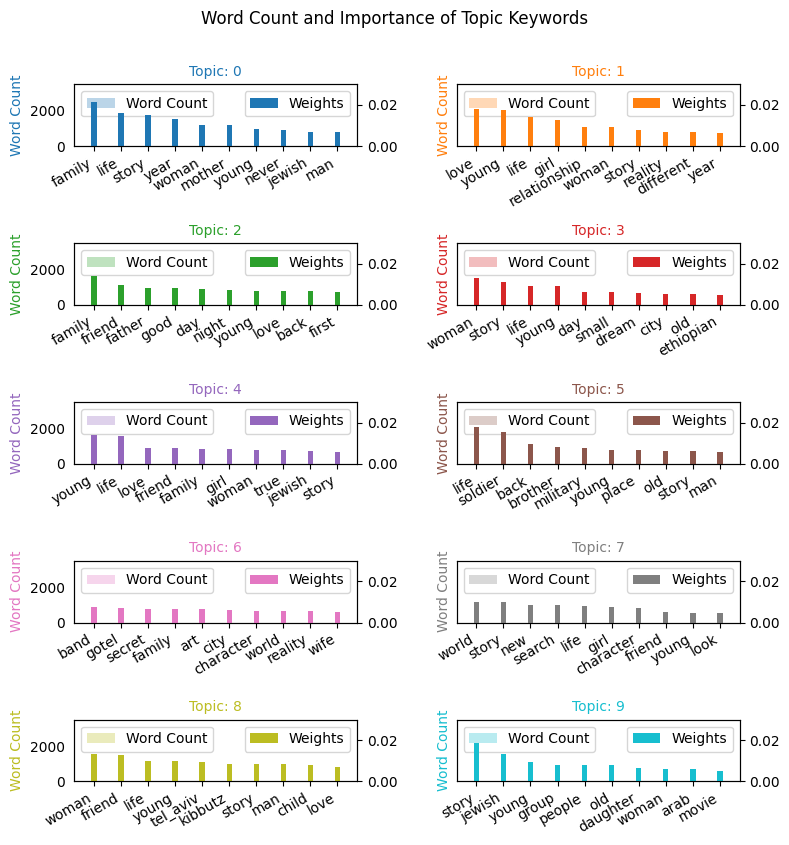

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in ready_data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(int(num_topics/2), 2, figsize=(8,8), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=10)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=12, y=1.05)    
plt.show()